In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import time




In [ ]:
data = pd.read_excel('/content/chronic_kidney_disease.xlsx')

X = data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
y = data['class']

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

conf_matrix = confusion_matrix(y_test, rf_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

Random Forest Accuracy: 1.0
Random Forest Sensitivity: 1.0
Random Forest Specificity: 1.0
Random Forest Precision: 1.0
Random Forest Elapsed Time: 0.15830492973327637
Random Forest Confusion Matrix:
[[23  0]
 [ 0  9]]
Decision Tree Accuracy: 0.96875
Decision Tree Sensitivity: 0.96875
Decision Tree Specificity: 1.0
Decision Tree Precision: 0.9700520833333334
Decision Tree Elapsed Time: 0.007000923156738281
Decision Tree Confusion Matrix:
[[23  0]
 [ 1  8]]
KNN Accuracy: 0.8125
KNN Sensitivity: 0.8125
KNN Specificity: 1.0
KNN Precision: 0.8106481481481481
KNN Elapsed Time: 0.08490371704101562
KNN Confusion Matrix:
[[22  1]
 [ 5  4]]


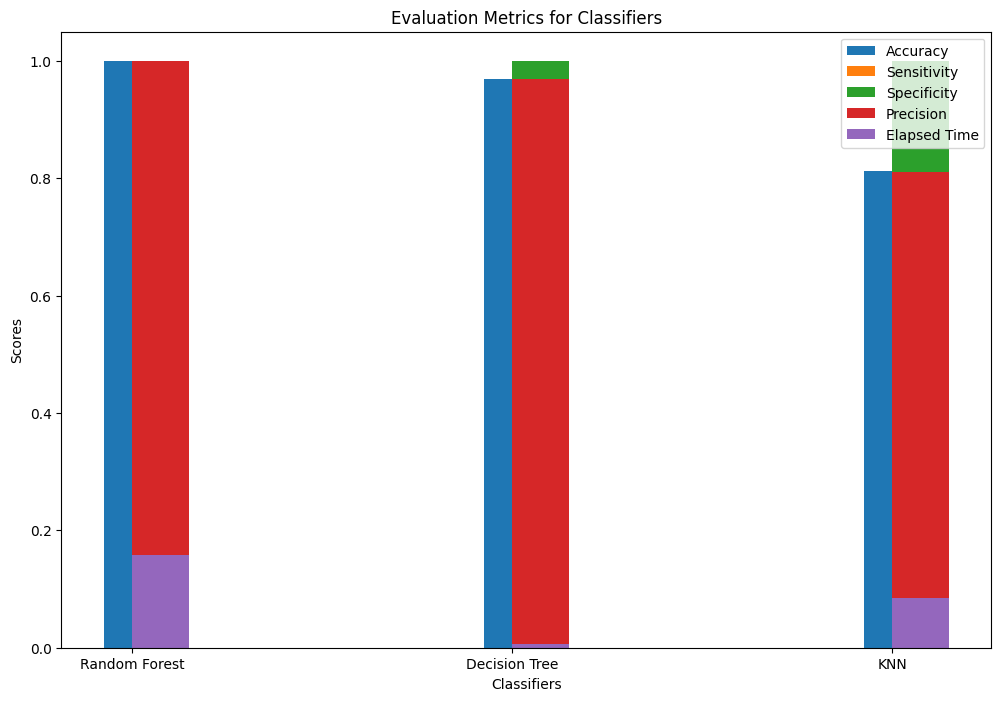

In [ ]:
classifiers = ['Random Forest', 'Decision Tree', 'KNN']
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
precision_scores = []
elapsed_times = []

# Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
elapsed_time_rf = time.time() - start_time

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

accuracy_scores.append(rf_accuracy)
sensitivity_scores.append(rf_recall)
specificity_scores.append(rf_specificity)
precision_scores.append(rf_precision)
elapsed_times.append(elapsed_time_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Sensitivity:", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest Precision:", rf_precision)
print("Random Forest Elapsed Time:", elapsed_time_rf)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Decision Tree
start_time = time.time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
elapsed_time_dt = time.time() - start_time

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

accuracy_scores.append(dt_accuracy)
sensitivity_scores.append(dt_recall)
specificity_scores.append(rf_specificity)
precision_scores.append(dt_precision)
elapsed_times.append(elapsed_time_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Sensitivity:", dt_recall)
print("Decision Tree Specificity:", rf_specificity)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Elapsed Time:", elapsed_time_dt)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

# KNN
start_time = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
elapsed_time_knn = time.time() - start_time

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

accuracy_scores.append(knn_accuracy)
sensitivity_scores.append(knn_recall)
specificity_scores.append(rf_specificity)
precision_scores.append(knn_precision)
elapsed_times.append(elapsed_time_knn)

print("KNN Accuracy:", knn_accuracy)
print("KNN Sensitivity:", knn_recall)
print("KNN Specificity:", rf_specificity)
print("KNN Precision:", knn_precision)
print("KNN Elapsed Time:", elapsed_time_knn)
print("KNN Confusion Matrix:")
print(knn_conf_matrix)

# Graph
x = range(len(classifiers))

plt.figure(figsize=(12, 8))

plt.bar(x, accuracy_scores, width=0.15, label='Accuracy', align='center')
plt.bar(x, sensitivity_scores, width=0.15, label='Sensitivity', align='edge')
plt.bar(x, specificity_scores, width=0.15, label='Specificity', align='edge')
plt.bar(x, precision_scores, width=0.15, label='Precision', align='edge')
plt.bar(x, elapsed_times, width=0.15, label='Elapsed Time', align='edge')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.xticks(x, classifiers)
plt.legend()
plt.title('Evaluation Metrics for Classifiers')
plt.show()


